In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("review_of_choco.csv")

df.head()


,Name,District/Location,Rating,Comment,Full Review
0,Nigar Nawar,"Certified Buyer, North Twenty Four Parganas Di...",5,Classy product,Osm😘😘READ MORE
1,uttam sahu,"Certified Buyer, Ganjam District",5,Excellent,I am happy with product 😍 😋 fillREAD MORE
2,Biplab,"Certified Buyer, Kalahandi District",5,Terrific,Nice chocolate taste with smooth texture....Ca...
3,Julie Choudhary,"Certified Buyer, Uttar Bagdogra",5,Wonderful,Woww it's amazing 😍 😍READ MORE
4,Omshree Kulkarni,"Certified Buyer, Hubli",5,Classy product,I loved it 😍READ MORE


In [3]:
# Remove "READ MORE" from the "Full Review" column
df['Full Review'] = df['Full Review'].str.replace('READ MORE', '')
df.head()

,Name,District/Location,Rating,Comment,Full Review
0,Nigar Nawar,"Certified Buyer, North Twenty Four Parganas Di...",5,Classy product,Osm😘😘
1,uttam sahu,"Certified Buyer, Ganjam District",5,Excellent,I am happy with product 😍 😋 fill
2,Biplab,"Certified Buyer, Kalahandi District",5,Terrific,Nice chocolate taste with smooth texture....Ca...
3,Julie Choudhary,"Certified Buyer, Uttar Bagdogra",5,Wonderful,Woww it's amazing 😍 😍
4,Omshree Kulkarni,"Certified Buyer, Hubli",5,Classy product,I loved it 😍


In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob

In [6]:
# 1. Average Rating
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)


Average Rating: 4.01


In [7]:
# 2. Most Common District/Location
common_location = df['District/Location'].mode()[0]
print("Most Common District/Location:", common_location)

Most Common District/Location: Certified Buyer, Bangalore


In [8]:
# 3. Top Comments
top_comments = df['Comment'].value_counts().head(3)
print("Top Comments:")
print(top_comments)

Top Comments:
Classy product        6
Wonderful             6
Highly recommended    5
Name: Comment, dtype: int64


In [9]:
# 4. Word Frequency in Full Reviews
full_reviews = ' '.join(df['Full Review'])
word_frequency = Counter(full_reviews.split()).most_common(10)
print("Top 10 Words in Full Reviews:")
print(word_frequency)


Top 10 Words in Full Reviews:
[('Good', 25), ('very', 17), ('product', 16), ('and', 13), ('chocolate', 11), ('is', 11), ('Very', 11), ('good', 10), ('I', 9), ('Nice', 9)]


In [10]:
# 5. Sentiment Analysis
sentiments = df['Full Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
average_sentiment = sentiments.mean()
print("Average Sentiment Polarity:", average_sentiment)


Average Sentiment Polarity: 0.3652992857142858


In [11]:
# 6. Length of Reviews
df['Review Length'] = df['Full Review'].apply(lambda x: len(x.split()))
average_review_length = df['Review Length'].mean()
print("Average Review Length:", average_review_length)

Average Review Length: 5.47


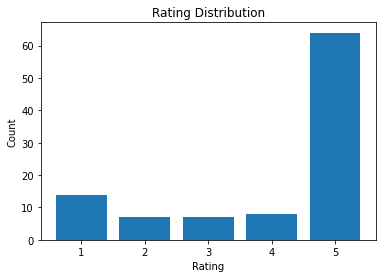

In [12]:
# 7. Rating Distribution
rating_distribution = df['Rating'].value_counts().sort_index()
plt.bar(rating_distribution.index, rating_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [13]:
# Define thresholds for sentiment categories
positive_threshold = 0.2
negative_threshold = -0.2

# Categorize sentiment based on thresholds
positive_reviews = sentiments[sentiments > positive_threshold].count()
negative_reviews = sentiments[sentiments < negative_threshold].count()
neutral_reviews = len(sentiments) - positive_reviews - negative_reviews

print("Number of Positive Reviews:", positive_reviews)
print("Number of Negative Reviews:", negative_reviews)
print("Number of Neutral Reviews:", neutral_reviews)


Number of Positive Reviews: 64
Number of Negative Reviews: 10
Number of Neutral Reviews: 26
